In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
fpaths = "../testes_seq_paral/test_greff_tudo_test_new_n/"

nucleos = 8

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 14, 18]
speedups = []

In [56]:
sequenciais = []

for i in sizes:
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        for linha in arquivo:
            if "seconds time elapsed" in linha:
                aux = linha.split("seconds")
                aux = aux[0]
                aux = float(aux.replace(",", "."))
                sequencial_local.append(float(aux))
    sequenciais.append(np.mean(sequencial_local))

In [57]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    paralelo_local.append(float(aux))
        paralelos_pthread.append(np.mean(paralelo_local))

In [58]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    paralelo_local.append(float(aux))
        paralelos_mpi.append(np.mean(paralelo_local))

In [59]:
pthreads_mpi = []

for i in sizes:
    for j in threads_mpi_pthreads:
        paralelo_local = []
        with open(f"{fpaths}logs_pthread_mpi/log_pthread_mpi_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    paralelo_local.append(float(aux))
        pthreads_mpi.append(np.mean(paralelo_local))

In [60]:
speedups_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(aux,len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(aux,aux+len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(aux,aux+len(threads))]
speedups_pthreads.append(speedup_local)

speedups_mpi = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(aux,len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(aux,aux+len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(aux,aux+len(threads))]
speedups_mpi.append(speedup_local)

speedups_mpi_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / pthreads_mpi[i] for i in range(aux,len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[1] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[2] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))]
speedups_mpi_pthreads.append(speedup_local)

In [61]:
eficiencia_pthreads = []

for i in speedups_pthreads[2]:
    eficiencia_pthreads.append(i/nucleos)

eficiencia_mpi = []

for i in speedups_mpi[2]:
    eficiencia_mpi.append(i/nucleos)

eficiencia_mpi_pthreads = []

for i in speedups_mpi_pthreads[2]:
    eficiencia_mpi_pthreads.append(i/nucleos)

In [62]:
eficiencia_mpi_pthreads

[0.12131462236721532,
 0.23283876578471507,
 0.3304014285908035,
 0.41193118496313064,
 0.5350874014492123,
 0.3994807989216691]

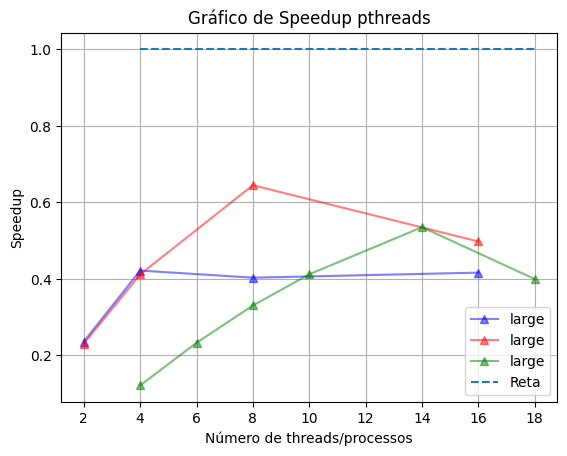

In [63]:
plt.plot(threads, eficiencia_pthreads, label='large', color='blue', marker='^', alpha=0.5)
plt.plot(threads, eficiencia_mpi, label='large', color='red', marker='^', alpha=0.5)
plt.plot(threads_mpi_pthreads, eficiencia_mpi_pthreads, label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads_mpi_pthreads, [1]*len(threads_mpi_pthreads), linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

In [64]:
print("pthreads")
for i, t in enumerate(threads):
    print(f"{t} {eficiencia_pthreads[i]}")

print("MPI")
for i, t in enumerate(threads):
    print(f"{t} {eficiencia_mpi[i]}")

print("MPI + pthreads")
for i, t in enumerate(threads_mpi_pthreads):
    print(f"{t} {eficiencia_mpi_pthreads[i]}")

pthreads
2 0.23596336311266639
4 0.42169804435232466
8 0.4031204594445428
16 0.41628555197586725
MPI
2 0.23066659716772542
4 0.411667000509954
8 0.6449403429030511
16 0.49772855167256747
MPI + pthreads
4 0.12131462236721532
6 0.23283876578471507
8 0.3304014285908035
10 0.41193118496313064
14 0.5350874014492123
18 0.3994807989216691
